# **PROBLEMA DE NEGOCIO**


---

### DataHouse somos una empresa de tecnología dedicada al rubro de los inmuebles, por medio de nuestros equipos tecnologicos realizamos análisis para empresas dedicadas a bienes raises con el fin de optimizar el performance de las inversion de estos para poder ofrecer ellos en la carterela de servicios un mejor precio a sus clientes según la espectatica de ellos, tenemos presencia en muchos paises de Latam y buscamos crecer para mejorar tanto la experiencia de la compra de tu casa como de tu negocio en bienes y raises buscando optener nuevas aliansas que nos permitan crecer y llegar a mas parte de todos nuestros hermanos latinoamiricanos

# **1. Configuración del Ambiente**


---

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Obtención y Tratamiento de Datos**


---


## **2.1 Cargando las bases de datos**

In [3]:
# Leer el archivo CSV comprimido
df_usa = pd.read_csv('../data/real_state_usa_compressed.csv.gz', compression='gzip', sep=';')
df_usa.head(10)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0,NaN
6,1205.0,for_sale,50000.0,3.0,1.0,0.20,1298094.0,Ciales,Puerto Rico,639.0,2040.0,NaN
7,50739.0,for_sale,71600.0,3.0,2.0,0.08,1048466.0,Ponce,Puerto Rico,731.0,1050.0,NaN
8,81909.0,for_sale,100000.0,2.0,1.0,0.09,734904.0,Ponce,Puerto Rico,730.0,1092.0,NaN
9,65672.0,for_sale,300000.0,5.0,3.0,7.46,1946226.0,Las Marias,Puerto Rico,670.0,5403.0,NaN


## **2.2 Tratamiento de datos**

In [4]:
print(df_usa.info())
print('-------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB
None
-------------


In [5]:
def verificacion(dataframe):
  global df_usa
    # Verificar valores nulos
  print("Valores nulos por columna:")
  print(dataframe.isnull().sum())
  print("\n")

  # Verificar duplicados
  duplicados = dataframe.duplicated()
  df_duplicados = dataframe[duplicados]
  if not df_duplicados.empty:
      print("Filas duplicadas:")
      print(df_duplicados)
      print("\n")

  # Contar valores únicos en cada columna
  print("Conteo de valores únicos por columna:")
  for columna in dataframe.columns:
      print(f"Columna '{columna}': {dataframe[columna].nunique()} valores únicos")
      print(f"Valores únicos en '{columna}':")
      #print(dataframe[columna].unique())
      print("\n")

  # Verificar tipos de datos por columna
  print("\nTipos de datos por columna:")
  for columna in dataframe.columns:
      print(f"Columna '{columna}': {dataframe[columna].dtype}")

  # Verificar tipos de datos y buscar inconsistencias
  for columna in dataframe.select_dtypes(include=['object', 'string']).columns:
      print(f"\nVerificando inconsistencias en la columna '{columna}':")
      inconsistencias = dataframe[dataframe[columna].apply(lambda x: not all(ord(c) < 128 for c in str(x)))]
      if not inconsistencias.empty:
          print(inconsistencias)
          print("\n")

  #Verificar Nan en todo el dataset
  print("Valores NaN por columna:")
  df_nan = dataframe[dataframe.isna().any(axis=1)]
  print(df_nan.head())
  print("\n")

In [6]:
def limpiar_datos(df):
    # Eliminar datos duplicados
    df = df.drop_duplicates()
    
    # Eliminar filas con valores nulos
    df = df.dropna()
    
    return df


### **2.2.1 Colombia Bógota**

In [7]:
verificacion(df_usa)

Valores nulos por columna:
brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64


Conteo de valores únicos por columna:
Columna 'brokered_by': 110143 valores únicos
Valores únicos en 'brokered_by':


Columna 'status': 3 valores únicos
Valores únicos en 'status':


Columna 'price': 102137 valores únicos
Valores únicos en 'price':


Columna 'bed': 99 valores únicos
Valores únicos en 'bed':


Columna 'bath': 86 valores únicos
Valores únicos en 'bath':


Columna 'acre_lot': 16057 valores únicos
Valores únicos en 'acre_lot':


Columna 'street': 2001358 valores únicos
Valores únicos en 'street':


Columna 'city': 20098 valores únicos
Valores únicos en 'city':


Columna 'state': 55 valores únicos
Valores únicos en 'state':


Columna 'zip

In [8]:
# Estadísticas descriptivas
print(df_usa.describe())

        brokered_by         price           bed          bath      acre_lot  \
count  2.221849e+06  2.224841e+06  1.745065e+06  1.714611e+06  1.900793e+06   
mean   5.293989e+04  5.241955e+05  3.275841e+00  2.496440e+00  1.522303e+01   
std    3.064275e+04  2.138893e+06  1.567274e+00  1.652573e+00  7.628238e+02   
min    0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    2.386100e+04  1.650000e+05  3.000000e+00  2.000000e+00  1.500000e-01   
50%    5.288400e+04  3.250000e+05  3.000000e+00  2.000000e+00  2.600000e-01   
75%    7.918300e+04  5.500000e+05  4.000000e+00  3.000000e+00  9.800000e-01   
max    1.101420e+05  2.147484e+09  4.730000e+02  8.300000e+02  1.000000e+05   

             street      zip_code    house_size  
count  2.215516e+06  2.226083e+06  1.657898e+06  
mean   1.012325e+06  5.218668e+04  2.714471e+03  
std    5.837635e+05  2.895408e+04  8.081635e+05  
min    0.000000e+00  0.000000e+00  4.000000e+00  
25%    5.063128e+05  2.961700e+04  1.3

C:\Users\eddwi\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


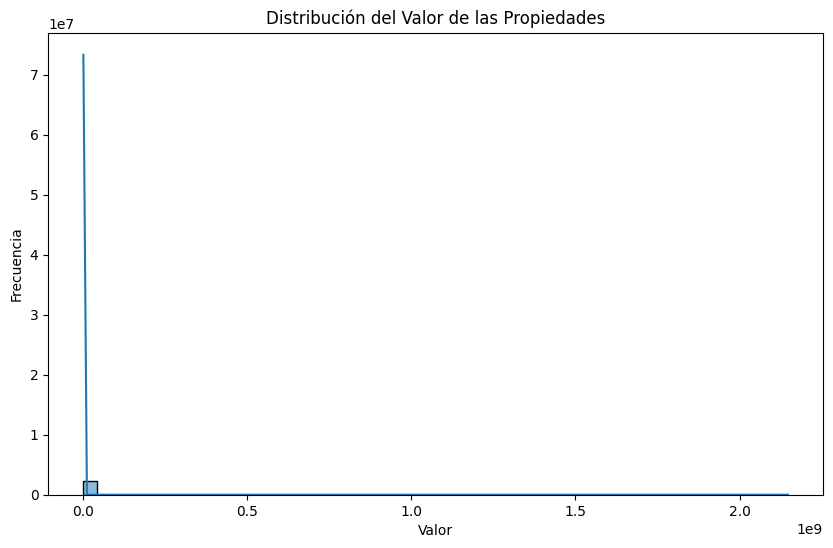

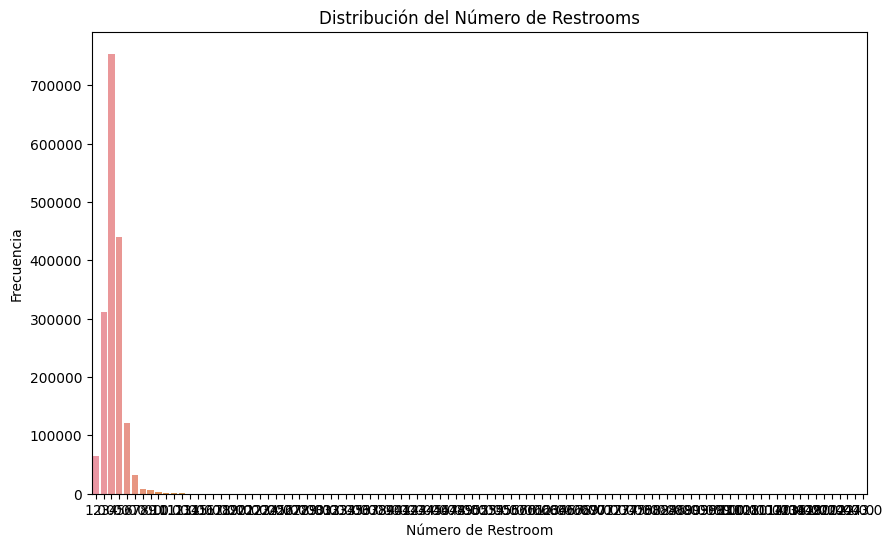

In [9]:
# Visualización de la distribución del valor de las propiedades
plt.figure(figsize=(10, 6))
sns.histplot(df_usa['price'], bins=50, kde=True)
plt.title('Distribución del Valor de las Propiedades')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de habitaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='bed', data=df_usa)
plt.title('Distribución del Número de Restrooms')
plt.xlabel('Número de Restroom')
plt.ylabel('Frecuencia')
plt.show()

In [29]:

# Aplicar la función al DataFrame
df_colombia_bogota_limpio = limpiar_datos(df_colombia_bogota)

# Mostrar las primeras filas del DataFrame limpio
print(df_colombia_bogota_limpio.head())

          Tipo                                 Descripcion  Habitaciones  \
0  Apartamento  Apartamento en venta en Zona Noroccidental             3   
1         Casa                   Casa en venta en Castilla             4   
2  Apartamento     Apartamento en venta en Chico Reservado             3   
3  Apartamento             Apartamento en venta en Usaquén             3   
4  Apartamento         Apartamento en venta en Bella Suiza             2   

   Baños  Área              Barrio                                    UPZ  \
0      2    70  Zona Noroccidental     CHAPINERO: Pardo Rubio + Chapinero   
1      3   170            Castilla            KENNEDY: Castilla + Bavaria   
2      3   144     Chico Reservado     CHAPINERO: Chicó Lago + El Refugio   
3      2   154             Usaquén                                Usaquén   
4      3   128         Bella Suiza  USAQUÉN: Country Club + Santa Bárbara   

             Valor  
0    $ 360.000.000  
1    $ 670.000.000  
2  $ 1.120.000.00

#### **Se decidio borrar UPZ porque consideramos que con la columna Barrio estaba mas que explicada la localización de las propiedades no obstante aún esta sujeto a cambios**

In [30]:
# Eliminar la columna 'UPZ'
df_colombia_bogota_limpio.drop(columns=['UPZ'], inplace=True)

In [31]:
# Función para limpiar y convertir la columna 'Valor'
def limpiar_valor(valor):
    valor_limpio = valor.replace('$', '').replace('COP', '').replace('.', '').replace(',', '')
    
    # Convertir a float
    return float(valor_limpio)

# Supongamos que df_colombia_bogota ya está cargado

# Aplicar la función a la columna 'Valor'
df_colombia_bogota_limpio['Valor'] = df_colombia_bogota_limpio['Valor'].apply(limpiar_valor)
# Verificar las primeras filas después de la conversión
print(df_colombia_bogota_limpio.head())

          Tipo                                 Descripcion  Habitaciones  \
0  Apartamento  Apartamento en venta en Zona Noroccidental             3   
1         Casa                   Casa en venta en Castilla             4   
2  Apartamento     Apartamento en venta en Chico Reservado             3   
3  Apartamento             Apartamento en venta en Usaquén             3   
4  Apartamento         Apartamento en venta en Bella Suiza             2   

   Baños  Área              Barrio         Valor  
0      2    70  Zona Noroccidental  3.600000e+08  
1      3   170            Castilla  6.700000e+08  
2      3   144     Chico Reservado  1.120000e+09  
3      2   154             Usaquén  8.900000e+08  
4      3   128         Bella Suiza  9.700000e+08  


In [32]:
df_colombia_bogota_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5918 entries, 0 to 9519
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          5918 non-null   object 
 1   Descripcion   5918 non-null   object 
 2   Habitaciones  5918 non-null   int64  
 3   Baños         5918 non-null   int64  
 4   Área          5918 non-null   int64  
 5   Barrio        5918 non-null   object 
 6   Valor         5918 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 369.9+ KB


Tipo            0
Descripcion     0
Habitaciones    0
Baños           0
Área            0
Barrio          0
Valor           0
dtype: int64
       Habitaciones        Baños           Área         Valor
count   5918.000000  5918.000000    5918.000000  5.918000e+03
mean       3.161372     2.545624     166.018080  6.550196e+08
std        2.316691     1.294754    2180.835312  7.668709e+08
min        1.000000     0.000000       2.000000  6.000000e+07
25%        2.000000     2.000000      60.000000  2.741500e+08
50%        3.000000     2.000000      87.000000  4.485000e+08
75%        3.000000     3.000000     152.000000  7.500000e+08
max      110.000000     9.000000  166243.000000  1.600000e+10


C:\Users\eddwi\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


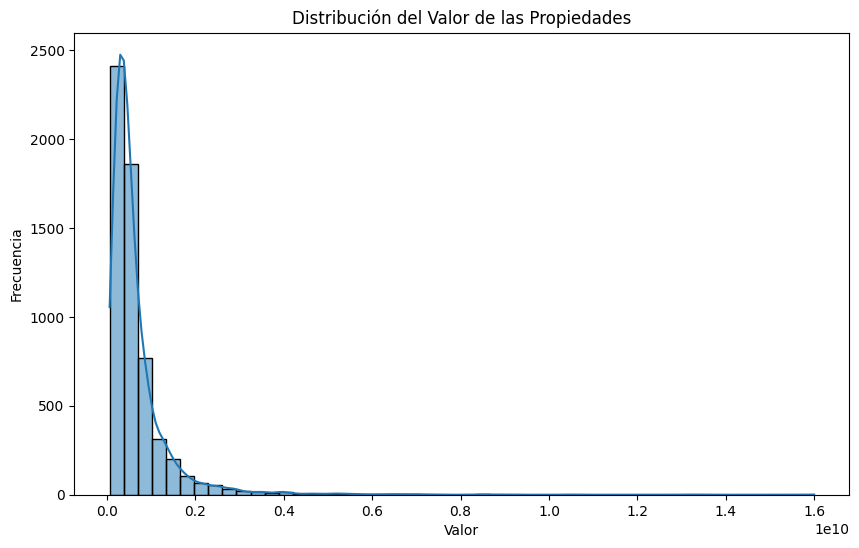

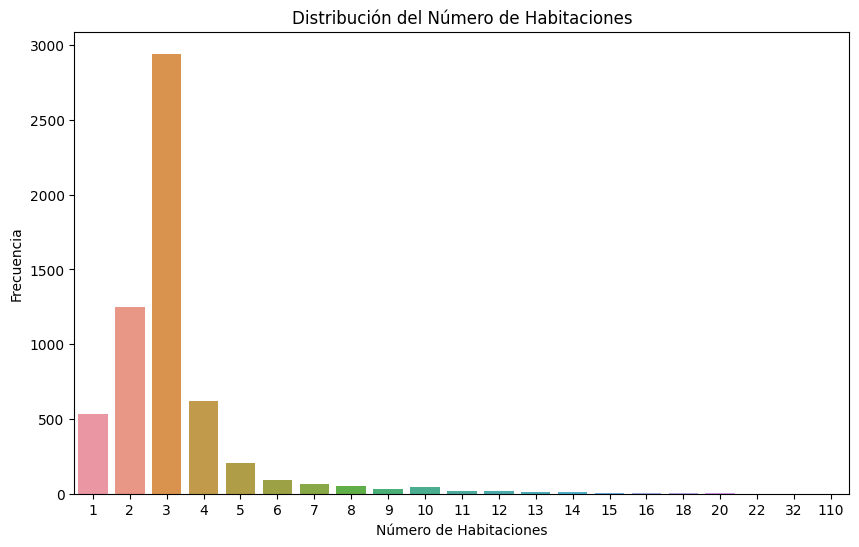

In [33]:
# Verificar si hay otros valores faltantes
print(df_colombia_bogota_limpio.isnull().sum())

# Estadísticas descriptivas
print(df_colombia_bogota_limpio.describe())

# Visualización de la distribución del valor de las propiedades
plt.figure(figsize=(10, 6))
sns.histplot(df_colombia_bogota_limpio['Valor'], bins=50, kde=True)
plt.title('Distribución del Valor de las Propiedades')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de habitaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='Habitaciones', data=df_colombia_bogota_limpio)
plt.title('Distribución del Número de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Frecuencia')
plt.show()

In [34]:
# Tasa de cambio
tasa_cambio_cop_usd = 3861.00

# Crear una nueva columna 'Valor_USD' a partir de 'Valor'
df_colombia_bogota_limpio['Valor_USD'] = df_colombia_bogota_limpio['Valor'] / tasa_cambio_cop_usd
# Redondear la columna 'Valor_USD' a dos decimales
df_colombia_bogota_limpio['Valor_USD'] = df_colombia_bogota_limpio['Valor_USD'].round(2)

# Verificar las primeras filas después de agregar la columna 'Valor_USD'
print(df_colombia_bogota_limpio.head())

          Tipo                                 Descripcion  Habitaciones  \
0  Apartamento  Apartamento en venta en Zona Noroccidental             3   
1         Casa                   Casa en venta en Castilla             4   
2  Apartamento     Apartamento en venta en Chico Reservado             3   
3  Apartamento             Apartamento en venta en Usaquén             3   
4  Apartamento         Apartamento en venta en Bella Suiza             2   

   Baños  Área              Barrio         Valor  Valor_USD  
0      2    70  Zona Noroccidental  3.600000e+08   93240.09  
1      3   170            Castilla  6.700000e+08  173530.17  
2      3   144     Chico Reservado  1.120000e+09  290080.29  
3      2   154             Usaquén  8.900000e+08  230510.23  
4      3   128         Bella Suiza  9.700000e+08  251230.25  


In [35]:
df_colombia_bogota_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5918 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          5918 non-null   object 
 1   Descripcion   5918 non-null   object 
 2   Habitaciones  5918 non-null   int64  
 3   Baños         5918 non-null   int64  
 4   Área          5918 non-null   int64  
 5   Barrio        5918 non-null   object 
 6   Valor         5918 non-null   float64
 7   Valor_USD     5918 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 416.1+ KB


In [36]:
barrios_unicos = df_colombia_bogota_limpio['Barrio'].unique()
print(barrios_unicos)

['Zona Noroccidental' 'Castilla' 'Chico Reservado' 'Usaquén' 'Bella Suiza'
 'El Chicó' 'Tintala' 'Marly' 'Kennedy' 'Nicolas De Federman' 'La Calleja'
 'Mazuren' 'Suba' 'Barrios Unidos' 'Engativa' 'Fontibón' 'Villa Alsacia'
 'Palermo' 'La Candelaria' 'El Contador' 'El Batán' 'Santa Barbara'
 'Mirandela ' 'Cedritos' 'Colina Campestre' 'Hayuelos' 'Ciudad Salitre'
 'Quinta Paredes' 'Candelaria La Nueva' 'Chico Norte' 'Normandia'
 'Ciudad Bolívar' 'Bosa' 'Rafael Uribe Uribe' 'Las Villas' 'Modelia'
 'San Patricio' 'Barrancas' 'Teusaquillo' 'Puente Aranda' 'Chapinero'
 'Usme' 'Nueva Zelandia' 'Madelena' 'El Plan' 'Santa Paula' 'Villemar'
 'Santa Fe' 'Antonio Nariño' 'La Uribe' 'Los Rosales' 'Chapinero Central'
 'Los Mártires' 'Bogotá D.C' 'San Cristobal' 'Boyaca ' 'Timiza'
 'Gran America' 'Costa Azul' 'Gran Granada' 'La Salle'
 'Portales Del Norte' 'Cantagallo' 'Ciudad Berna' 'Villas De Granada'
 'Santa Teresa' 'Eduardo Santos' 'Florida Blanca' 'Metropolis' 'Galicia'
 'Villa Maria' 'Puente La

In [37]:
# Borrar las zonas de la columna 'Descripcion'
#for zona in barrios_unicos:
#    df_colombia_bogota_limpio['Descripcion'] = df_colombia_bogota_limpio['Descripcion'].str.replace(zona, '')

# Mostrar el DataFrame actualizado
#print(df_colombia_bogota_limpio)

In [38]:
# Obtener todos los valores únicos en la columna 'Descripcion'
#descripcion_unicos = df_colombia_bogota_limpio['Descripcion'].unique()

# Mostrar los valores únicos en 'Descripcion'
#print(descripcion_unicos)

In [40]:
df_colombia_bogota_limpio.to_csv('../data/colombia_bogota_limpio.csv', index=False, sep=';')